In [1]:
import numpy as np
import pandas as pd
import glob 
import csv
import traceback
import datetime
import os
pd.options.display.max_columns=50

In [2]:
def firstCheck(df):
    """ Sorting and indexing necessary for data preparation """
    df = df.dropna(subset=["illicit"])
    df = df.sort_values("sgd.date")
    df = df.reset_index(drop=True)
    return df

dfs = firstCheck(pd.read_csv('../data/cdata.csv'))

In [3]:
for df in [dfs]:
    print(df['importer.id'].nunique(), df['tariff.code'].nunique(), df['country'].nunique())

8699 5491 241


In [43]:
dfs[dfs['sgd.date'] < '16-02-01'].shape

(17807, 15)

In [44]:
dfs

,sgd.id,sgd.date,importer.id,declarant.id,country,office.id,tariff.code,quantity,gross.weight,fob.value,cif.value,total.taxes,illicit,revenue,HS2
0,f30dbbec00f1289abfa83760d54c58d9,16-01-02,unknown_importer,76ee9b989dc2f0d44c1a4c1a82cae6526f4dc0c8,AE,CMDLA,640590000000,1.0,100.0,81278,81278,46936,0,0.0,6405
1,ef407de60667918392506e0063487524,16-01-02,unknown_importer,76ee9b989dc2f0d44c1a4c1a82cae6526f4dc0c8,AE,CMDLA,851770000000,1.0,150.0,212376,212376,72737,0,0.0,8517
2,90b91593e371a944c91fc52793273bd5,16-01-02,unknown_importer,76ee9b989dc2f0d44c1a4c1a82cae6526f4dc0c8,AE,CMDLA,851770000000,1.0,150.0,212376,212376,72737,0,0.0,8517
3,0f1eed4b2d12b4d52fade2ec0b7b010d,16-01-02,unknown_importer,76ee9b989dc2f0d44c1a4c1a82cae6526f4dc0c8,AE,CMDLA,851770000000,1.0,180.0,265470,265470,90922,0,0.0,8517
4,8502e57cc4e42a91662bdbe408a84ed1,16-01-03,unknown_importer,c02f0861a585a64921dc7ef3f9ea61ea64dbeb74,CN,CMDP3,940360000000,1449.0,30000.0,16374000,16374000,10274685,0,0.0,9403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896864,c4948a0da931995dfad6983e776b7e07,19-12-31,02579cekmqrsty,26c9655de56926f7068ff4bba28506a776928e28,FR,CMDCP,382200000000,0.2,0.2,227794,230915,23552,0,0.0,3822
1896865,1b71f36dad1185298cd4fdf03d75ac2b,19-12-31,unknown_importer,0514ab1836089bf8a100d7009abb5c5a02ed9388,ES,CMDP3,901831000000,2104.0,3104.0,11670246,11670246,1773876,0,0.0,9018
1896866,b39264d23612c9f44e524b0f5191417b,19-12-31,015678ceklprsty,4425e22415270cb715ea2a608570878b6e1c6c23,JP,CMDP5,940429000000,1.0,37.0,15000,15000,9442,0,0.0,9404
1896867,a14f8d77e9933faf690de3cf55f63686,19-12-31,01268cekmrsty,44bb62d37ced699834600acb8b506920fa3f09ff,IT,CMDLA,700992000000,1.0,50.0,269205,411109,258791,0,0.0,7009


In [5]:
dfs[dfs['importer.id'] == 'IMP826164']['tariff.code'].value_counts()

Series([], Name: tariff.code, dtype: int64)

In [6]:
dfs['importer.id'].value_counts()

unknown_importer    275393
0378cekmprsty        67509
0134679cegkmrsty     44914
035789cekmnrsty      41236
04789cekmqrsty       35057
                     ...  
014568cehkprsty          1
0235789ceknprsty         1
0146bcekmrsty            1
123489cegkprsty          1
0267ceklprsty            1
Name: importer.id, Length: 8699, dtype: int64

In [7]:
for impid in dfs['importer.id'].value_counts().head(100).keys():
    firstday = min(df[df['importer.id'] == impid]['sgd.date'])
    print(firstday)

16-01-02
16-01-06
16-01-11
16-01-12
16-01-11
16-01-07
16-01-18
16-01-06
16-01-08
16-01-06
16-01-05
16-01-07
16-01-08
16-01-07
16-01-08
16-01-05
16-09-28
16-01-11
16-01-07
16-01-05
16-01-19
16-01-08
16-01-11
16-01-05
16-01-12
16-01-06
16-01-08
16-01-12
16-01-08
16-01-06
16-01-05
16-01-04
16-01-13
16-01-21
16-01-05
16-01-05
16-01-06
16-01-04
16-01-20
16-01-06
16-05-04
16-01-14
16-01-14
16-03-31
16-01-14
16-01-06
16-01-07
16-01-06
16-01-13
16-01-07
16-01-12
16-01-05
16-01-04
16-01-13
16-01-05
16-01-06
16-01-06
16-01-08
16-01-14
16-01-05
16-01-06
16-01-14
16-01-04
16-01-08
16-01-04
16-01-05
16-01-04
16-01-14
16-01-11
16-02-22
16-01-05
16-01-05
16-01-08
16-01-14
16-01-06
16-01-12
16-01-04
16-03-03
16-01-08
16-01-06
16-01-04
16-01-07
16-01-05
16-01-15
16-01-04
16-01-04
16-06-13
16-01-08
16-01-07
16-01-20
17-04-17
16-01-08
16-01-07
16-01-05
16-01-26
16-01-13
16-01-08
16-01-19
16-01-07
16-01-08


In [8]:
dfs['country'].value_counts()

CN    316591
FR    292152
JP    158402
US    141647
DE    125786
       ...  
SJ         2
PF         1
EU         1
BQ         1
WS         1
Name: country, Length: 241, dtype: int64

In [9]:
dfs['tariff.code'].apply(lambda x: x//100000000).value_counts()

8703    125693
8708     54813
9404     45765
2710     39710
7318     39361
         ...  
205          1
8111         1
2613         1
2610         1
2913         1
Name: tariff.code, Length: 1196, dtype: int64

In [10]:
dfs['HS2'] = dfs['tariff.code'].apply(lambda x: x//100000000)

In [11]:
dfs.groupby(['HS2'])['illicit'].apply(np.mean)

HS2
101     0.133333
102     0.007576
103     0.000000
104     0.000000
105     0.032787
          ...   
9703    0.030303
9704    0.000000
9705    0.000000
9706    0.000000
9801    0.005550
Name: illicit, Length: 1196, dtype: float64

#### Average illicit rates

In [15]:
# Synthetic

date_begin = '20160101'
test_length = 7

start_day = datetime.date(int(date_begin[:4]), int(date_begin[4:6]), int(date_begin[6:8]))
period = datetime.timedelta(days=test_length)    
end_day = start_day + datetime.timedelta(days=test_length)    

old_IID = set()
new_proportions = []

avg_illicit_rates_s = []
num_trades_s = []
num_HS2_type_s = []
avg_prices = []

for week in range(52):
    weekly_trade = dfs[(dfs['sgd.date'] < end_day.strftime('%y-%m-%d')) & (dfs['sgd.date'] >= start_day.strftime('%y-%m-%d'))]
    start_day = end_day
    end_day = start_day + datetime.timedelta(days=test_length)
    avg_illicit_rates_s.append(np.mean(weekly_trade['illicit']))
    num_trades_s.append(len(weekly_trade))
    num_HS2_type_s.append(weekly_trade['HS2'].nunique())
    avg_prices.append(np.mean(weekly_trade['fob.value']))

In [16]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [17]:
avg_illicit_rates_s = np.nan_to_num(np.array(avg_illicit_rates_s), nan=np.mean(dfs['illicit']))

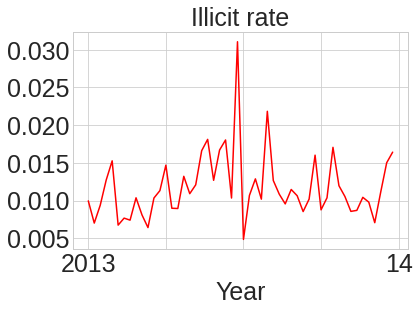

In [18]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(avg_illicit_rates_s).rolling(1).mean(), color='red')
plt.title('Illicit rate', fontsize=25)
plt.xlabel('Year', fontsize=25)
# plt.ylabel('Illicit rate', fontsize=25)
plt.xticks(ticks=[0,13,26,39,52], labels=['2013','','','','14'], fontsize=25)
plt.yticks(fontsize=25)
f.savefig("illicit_rate_c.pdf", bbox_inches='tight')

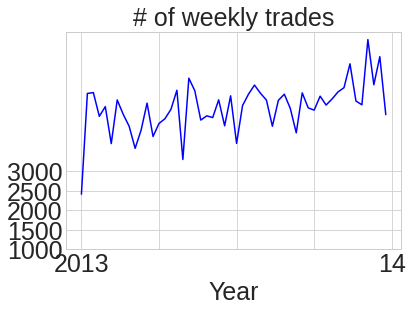

In [19]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(num_trades_s).rolling(1).mean(), color='blue')
plt.title('# of weekly trades', fontsize=25)
plt.xlabel('Year', fontsize=25)
# plt.ylabel('# of daily trade', fontsize=25)
plt.xticks(ticks=[0,13,26,39,52], labels=['2013', '','','',14], fontsize=25)
plt.yticks(ticks=[1000,1500,2000,2500,3000], labels=[1000,1500,2000,2500,3000], fontsize=25)
f.savefig("num_weekly_trades_c.pdf", bbox_inches='tight')

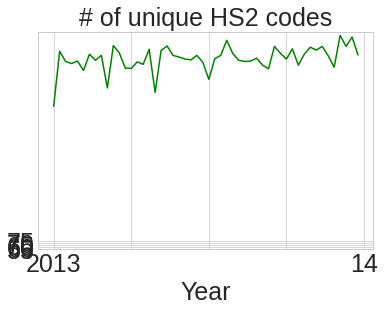

In [20]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(num_HS2_type_s).rolling(1).mean(), color='green')
plt.title('# of unique HS2 codes', fontsize=25)
plt.xlabel('Year', fontsize=25)
# plt.ylabel('# of unique HS2', fontsize=25)
plt.xticks(ticks=[0,13,26,39,52], labels=['2013', '','','',14], fontsize=25)
plt.yticks(ticks=[55,60,65,70,75], labels=[55,60,65,70,75], fontsize=25)
f.savefig("num_HS2_c.pdf", bbox_inches='tight')

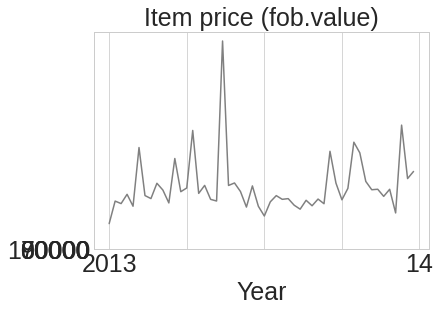

In [21]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(avg_prices).rolling(1).mean(), color='gray')
plt.title('Item price (fob.value)', fontsize=25)
plt.xlabel('Year', fontsize=25)
# plt.ylabel('Average fob.value', fontsize=25)
plt.xticks(ticks=[0,13,26,39,52], labels=['2013', '','','',14], fontsize=25)
plt.yticks(ticks=[70000,80000,90000,100000], labels=[70000,80000,90000,100000], fontsize=25)
f.savefig("average_prices_c.pdf", bbox_inches='tight')

In [23]:
date_begin = '20160101'
test_length = 7

start_day = datetime.date(int(date_begin[:4]), int(date_begin[4:6]), int(date_begin[6:8]))
period = datetime.timedelta(days=test_length)    
end_day = start_day + datetime.timedelta(days=test_length)    

old_IID = set()
new_proportions = []

novel_rate_s = []

for week in range(52):
    weekly_trade = dfs[(dfs['sgd.date'] < end_day.strftime('%y-%m-%d')) & (dfs['sgd.date'] >= start_day.strftime('%y-%m-%d'))]
    start_day = end_day
    end_day = start_day + datetime.timedelta(days=test_length)
    new_trade = weekly_trade[~weekly_trade['importer.id'].isin(old_IID)]
    old_IID = old_IID.union(weekly_trade['importer.id'].values)
    try:
        novel_rate = sum(new_trade['illicit'])/len(weekly_trade)
    except:
        novel_rate = np.nan
    novel_rate_s.append(novel_rate)
print(novel_rate_s)
novel_rate_s = np.nan_to_num(np.array(novel_rate_s), nan=0)

[0.009962640099626401, 0.00481251253258472, 0.005190656817728089, 0.00408905043162199, 0.003870967741935484, 0.0013498920086393088, 0.0026965359883841526, 0.00202020202020202, 0.0028936580660718593, 0.0008375209380234506, 0.0012348728081007657, 0.002743194766828445, 0.0012866700977869274, 0.00047404598246029864, 0.0018428933425478, 0.0017463435931019428, 0.0005918327086210298, 0.001212856276531231, 0.001301841175376604, 0.0015822784810126582, 0.005341384115188109, 0.0009062075215224287, 0.0006864988558352403, 0.0012437810945273632, 0.00048088482808367395, 0.0014207428455449563, 0.00026961445133459155, 0.0006412997007268063, 0.0008048289738430583, 0.0005768121515093252, 0.0006009615384615385, 0.00041511000415110004, 0.00024108003857280618, 0.00020785699438786114, 0.00020128824476650564, 0.0015204170286707212, 0.00025131942699170643, 0.00039984006397441024, 0.00043299415457891317, 0.0004385964912280702, 0.0006100040666937779, 0.0006396588486140725, 0.0002063557573256294, 0.00059677740202

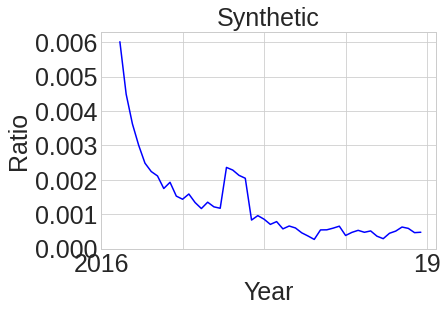

In [24]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(novel_rate_s).rolling(4).mean(), color='blue')
plt.title('Synthetic', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Ratio', fontsize=25)
plt.xticks(ticks=[0,13,26,39,52], labels=['2016', '','','',19], fontsize=25)
plt.yticks(fontsize=25)
f.savefig("proportion-of-novel-frauds-from-new-importer-c.pdf", bbox_inches='tight')

In [25]:
plt.style.use('seaborn-whitegrid')
f = plt.figure()
plt.plot(pd.Series(novel_rate_m).rolling(4).mean(), color='blue')
plt.plot(pd.Series(novel_rate_t).rolling(4).mean(), color='red')
plt.plot(pd.Series(novel_rate_n).rolling(4).mean(), color='green')
plt.title('Country M', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Ratio', fontsize=25)
plt.xticks(ticks=[0,51,103,155,207], labels=['2013', 14, 15, 16,17], fontsize=25)
plt.yticks(fontsize=25)
f.savefig("proportion-of-novel-frauds-from-new-importer-mnt.pdf", bbox_inches='tight')

NameError: name 'novel_rate_m' is not defined

<Figure size 432x288 with 0 Axes>